In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [261]:
df=pd.read_csv('data_set.csv')

In [262]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [263]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [264]:
df.isnull().sum().sum()/614

0.24267100977198697

25% data will be lost by remving the rows with nan values

In [265]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [266]:
df=df.dropna()
df=df.drop('Loan_ID',axis=1)

In [267]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [268]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [269]:
df['Credit_History']=df['Credit_History'].astype(str)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(str)

In [270]:
categorical_features=['Gender', 'Married', 'Dependents', 'Education','Loan_Amount_Term',
       'Self_Employed', 'Credit_History', 'Property_Area']
continuous_features=[x for x in df.columns.tolist() if x not in categorical_features+['Loan_Status']]

In [271]:
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [272]:
dummies=pd.get_dummies(df[categorical_features]).drop(['Loan_Amount_Term_120.0','Property_Area_Rural','Self_Employed_No','Credit_History_0.0','Education_Graduate','Dependents_0','Married_Yes','Gender_Female'],axis=1)

In [273]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [274]:
df.drop(categorical_features,axis=1,inplace=True)

In [275]:
df=pd.concat([df,dummies],axis=1)

In [276]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'Gender_Male', 'Married_No', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_360.0',
       'Loan_Amount_Term_480.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [277]:
categorical_features=[x for x in df.columns.tolist() if x not in continuous_features+['Loan_Status']]

In [278]:
categorical_features

['Gender_Male',
 'Married_No',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Loan_Amount_Term_180.0',
 'Loan_Amount_Term_240.0',
 'Loan_Amount_Term_300.0',
 'Loan_Amount_Term_36.0',
 'Loan_Amount_Term_360.0',
 'Loan_Amount_Term_480.0',
 'Loan_Amount_Term_60.0',
 'Loan_Amount_Term_84.0',
 'Self_Employed_Yes',
 'Credit_History_1.0',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

C:\Users\Akash Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


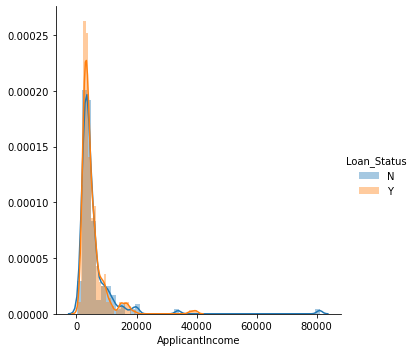

In [279]:
sns.FacetGrid(df,hue='Loan_Status',size=5).map(sns.distplot,'ApplicantIncome'). add_legend()

Distribution for ApplicantIncome is silmilar for both the category, so it wont be a useful feature

C:\Users\Akash Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


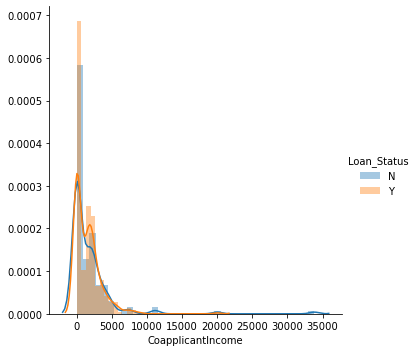

In [21]:
sns.FacetGrid(df,hue='Loan_Status',size=5).map(sns.distplot,'CoapplicantIncome'). add_legend()

Distribution for CoapplicantIncome is silmilar for both the category, so it wont be a useful feature

C:\Users\Akash Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


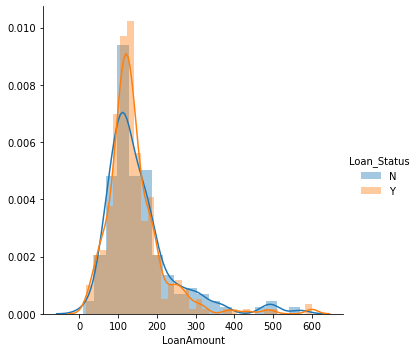

In [22]:
sns.FacetGrid(df,hue='Loan_Status',size=5).map(sns.distplot,'LoanAmount'). add_legend()

Distribution for Loan Ammount is silmilar for both the category, so it wont be a useful feature

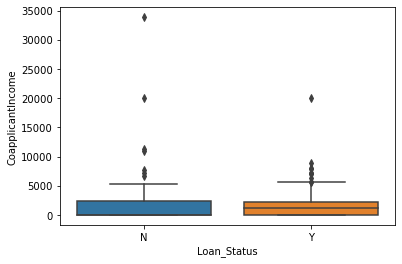

In [24]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome', data=df)
plt.show()

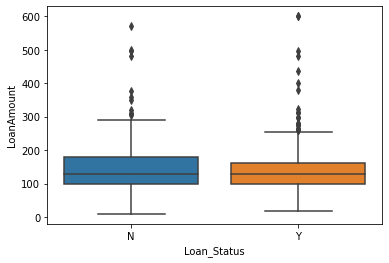

In [25]:
sns.boxplot(x='Loan_Status',y='LoanAmount', data=df)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

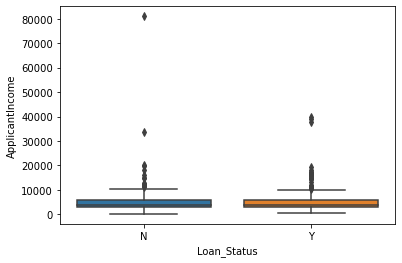

In [26]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome', data=df)

In [280]:
categorical_features=['Gender_Male', 'Married_No', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_360.0',
       'Loan_Amount_Term_480.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Self_Employed_Yes', 'Credit_History_1.0',
       'Property_Area_Semiurban', 'Property_Area_Urban']

In [281]:
for i in categorical_features:
    df[i]=df[i].astype('category').cat.codes

In [282]:
# for i in ["Loan_Status"]:
#     df[i]=df[i].astype('category').cat.codes
encoder= ce.OrdinalEncoder(cols=['Loan_Status'],return_df=True,
                           mapping=[{'col':'Loan_Status',
'mapping':{'Y':0,'N':1}}])
df = encoder.fit_transform(df)

C:\Users\Akash Raj\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [283]:
df['LoanAmount_bool']=np.where(df['LoanAmount']>280,1,0)
df['CoapplicantIncome_bool']=np.where(df['CoapplicantIncome']>10000,1,0)
df['ApplicantIncome_bool']=np.where(df['ApplicantIncome']>20000,1,0)
categorical_features=categorical_features+['LoanAmount_bool','CoapplicantIncome_bool','ApplicantIncome_bool']


C:\Users\Akash Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


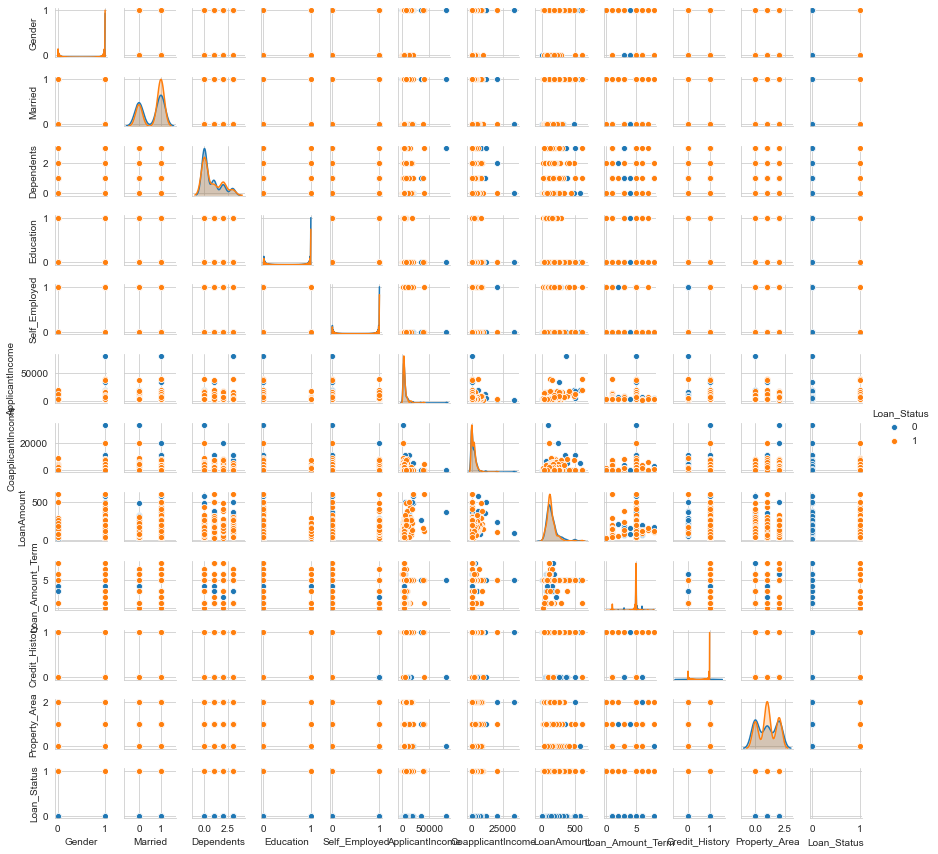

In [180]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Loan_Status", size=1);
plt.show()

C:\Users\Akash Raj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Akash Raj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


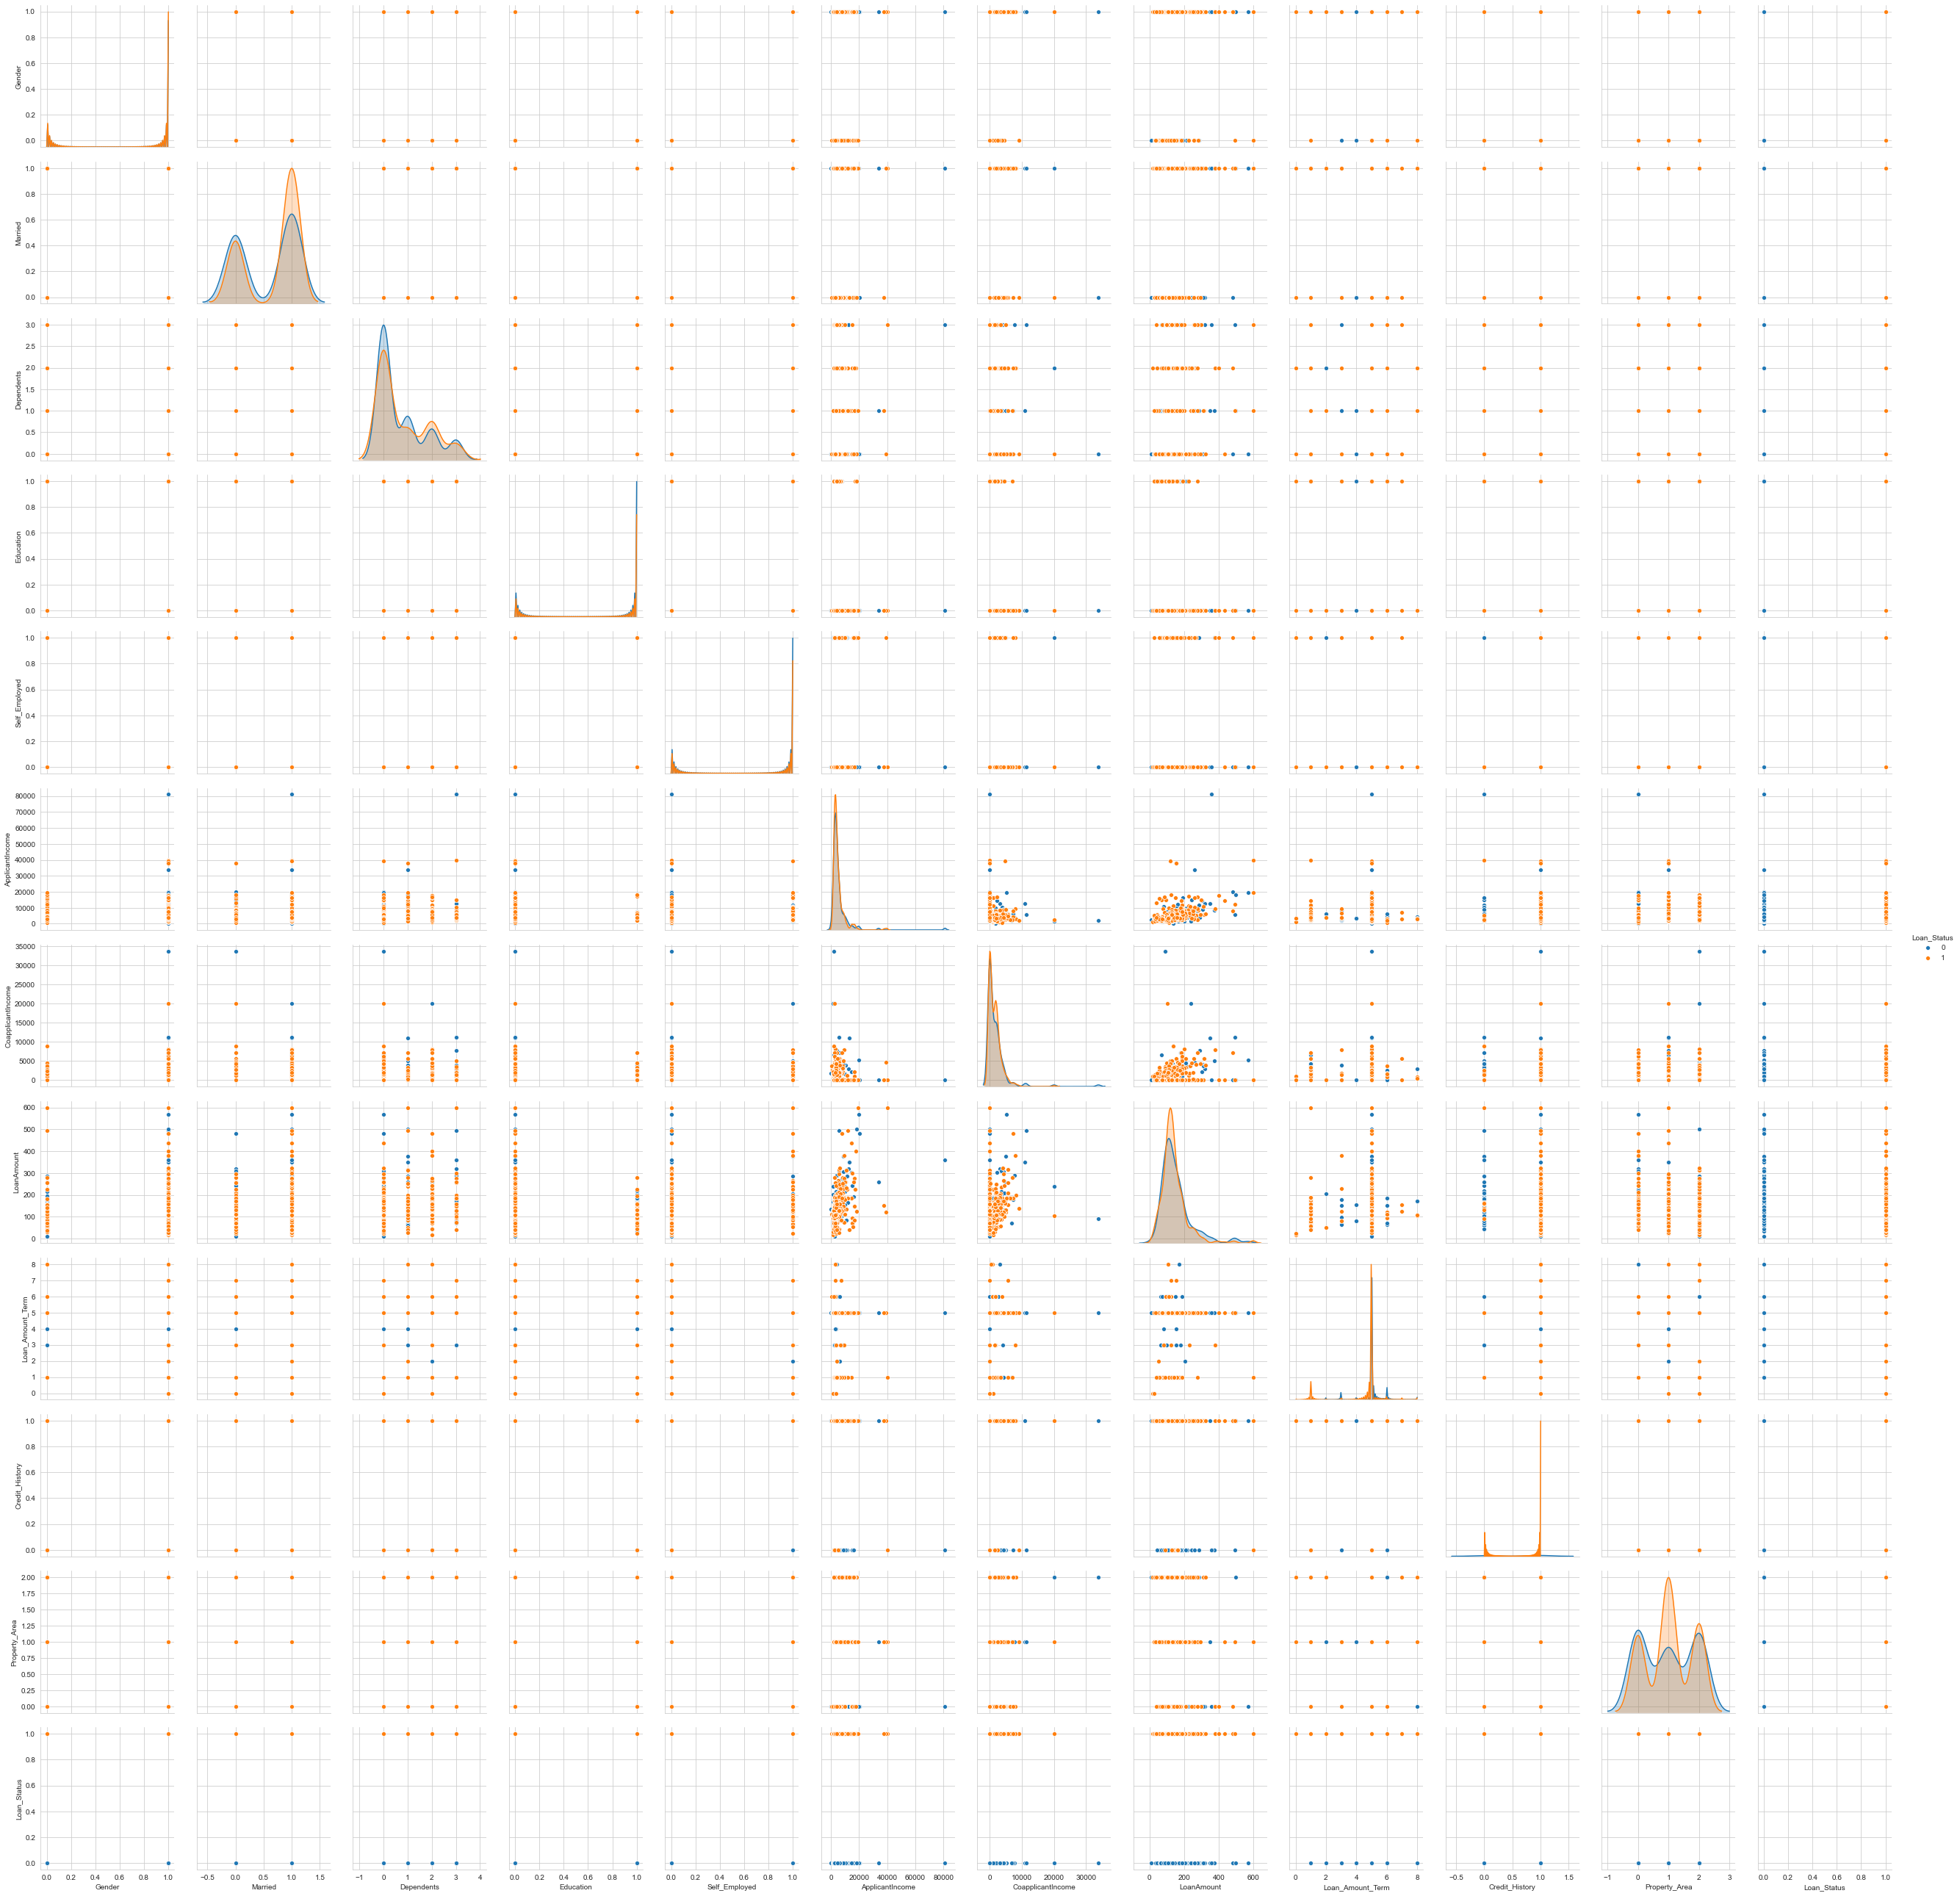

In [181]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Loan_Status", size=3);
plt.show()

In [25]:
pd.crosstab(df['Dependents_3+'],df['Loan_Status'])

Loan_Status,0,1
Dependents_3+,,
0,304,135
1,28,13


In [284]:
dependent=[]
independent=[]
for i in categorical_features:
    dataset_table=pd.crosstab(df[i],df['Loan_Status'])
    stat, p, dof, expected=stats.chi2_contingency(dataset_table)
    print(i,p)
    alpha = 0.05
    if p <= alpha:
#         print(i+' is Dependent (reject H0)')
        dependent.append(i)
        
    else:
        independent.append(i)
#         print(i+' is Independent (fail to reject H0)')
print("\nDependent features: ",dependent)
print("Independent features: ",independent)

Gender_Male 0.1990183114281211
Married_No 0.018405456386355386
Dependents_1 0.4523979644914705
Dependents_2 0.1394179466778432
Dependents_3+ 0.9600456673000213
Education_Not Graduate 0.16872400009733118
Loan_Amount_Term_180.0 0.8806861234994061
Loan_Amount_Term_240.0 0.8579290381272372
Loan_Amount_Term_300.0 0.2087703314667433
Loan_Amount_Term_36.0 0.17529994039472208
Loan_Amount_Term_360.0 0.041808482641332016
Loan_Amount_Term_480.0 0.016143830237516532
Loan_Amount_Term_60.0 0.8579290381272372
Loan_Amount_Term_84.0 0.5940303004379806
Self_Employed_Yes 0.5371943232746994
Credit_History_1.0 2.135981766869101e-30
Property_Area_Semiurban 0.0009331763860548035
Property_Area_Urban 0.26293286716677466
LoanAmount_bool 0.03305301523173479
CoapplicantIncome_bool 0.05659677148764436
ApplicantIncome_bool 0.5630999518337738

Dependent features:  ['Married_No', 'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0', 'Credit_History_1.0', 'Property_Area_Semiurban', 'LoanAmount_bool']
Independent feature

In [285]:
dependent

['Married_No',
 'Loan_Amount_Term_360.0',
 'Loan_Amount_Term_480.0',
 'Credit_History_1.0',
 'Property_Area_Semiurban',
 'LoanAmount_bool']

In [286]:
corr_cat=pd.DataFrame(np.zeros((len(categorical_features),len(categorical_features))))
corr_cat.columns=categorical_features
corr_cat.index=categorical_features

In [287]:
for i in categorical_features:
    for j in categorical_features:
        dataset_table=pd.crosstab(df[i],df[j])
        stat, p, dof, expected=stats.chi2_contingency(dataset_table)
        alpha = 0.01
        if p <= alpha:
            corr_cat.loc[i,j]=1
#                 print(i+" , "+j+' is Dependent (reject H0)')
#             else:
#                 print(i+" , "+j+' is Independent (fail to reject H0)')

In [288]:
corr_cat

,Gender_Male,Married_No,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,...,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_bool,CoapplicantIncome_bool,ApplicantIncome_bool
Gender_Male,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Married_No,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dependents_1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dependents_2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dependents_3+,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Education_Not Graduate,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_Amount_Term_180.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_Amount_Term_240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Loan_Amount_Term_300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loan_Amount_Term_36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [304]:
# X=df.drop('Loan_Status',axis=1)
# X=df[['Married', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
# X=df[['Married', 'Credit_History']]
# X=df[['Married_No', 'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0', 'Credit_History_1.0', 'Property_Area_Semiurban']]
X=df[dependent]
y=df['Loan_Status']

In [305]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [306]:
y_train.value_counts()

0    220
1    101
Name: Loan_Status, dtype: int64

In [307]:
y_test.value_counts()

0    112
1     47
Name: Loan_Status, dtype: int64

In [308]:
s=StandardScaler()
s.fit(X_train)
X_train=s.transform(X_train)
X_test=s.transform(X_test)

In [309]:
# model=DecisionTreeClassifier(max_depth=10)
# model=RandomForestClassifier(max_depth=10)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)

In [313]:
model.fit(X_train,y_train)
y_pred=model.predict(X_train)

In [314]:
confusion_matrix(y_train,y_pred)

array([[213,   7],
       [ 51,  50]], dtype=int64)

In [315]:
f1_score(y_train,y_pred)

0.6329113924050632

In [316]:
y_pred_test=model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred_test))

,0,1
0,111,1
1,31,16


In [317]:
f1_score(y_test,y_pred_test)

0.5

In [320]:
pd.DataFrame({'cols':dependent,'coeff':model.coef_[0]})

,cols,coeff
0,Married_No,0.185808
1,Loan_Amount_Term_360.0,-0.007020
2,Loan_Amount_Term_480.0,0.254037
3,Credit_History_1.0,-1.222051
4,Property_Area_Semiurban,-0.321158
5,LoanAmount_bool,0.193290


# Hyperparameter tuning

In [328]:
model=LogisticRegression()
params=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

In [329]:
# model=RandomForestClassifier()
# params={'bootstrap': [True, False],
#  'max_depth': [10, 20 ,None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [50,100,200]}

In [330]:
cv=GridSearchCV(model,params,scoring='f1',cv=2)
cv.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [331]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [332]:
cv.score(X_train,y_train)

0.6329113924050632

In [333]:
y_pred_test=cv.best_estimator_.predict(X_test)

In [334]:
f1_score(y_test,y_pred_test)

0.5

<H1>Boolean Feature Engineering

In [335]:
feature_engineered_boolena=[]
for i in range(len(categorical_features)-1):
    for j in range(i+1,len(categorical_features)):
        feature_engineered_boolena.append(categorical_features[i]+' and '+categorical_features[j])
        df[categorical_features[i]+' and '+categorical_features[j]]=df[categorical_features[i]]&df[categorical_features[j]]

dependent=[]
independent=[]
for i in feature_engineered_boolena+categorical_features:
    dataset_table=pd.crosstab(df[i],df['Loan_Status'])
    stat, p, dof, expected=stats.chi2_contingency(dataset_table)
    print(i,p)
    alpha = 0.05
    if p <= alpha:
#         print(i+' is Dependent (reject H0)')
        dependent.append(i)
        
    else:
        independent.append(i)
#         print(i+' is Independent (fail to reject H0)')
print("\nDependent features: ",dependent)
print("Independent features: ",independent)

Gender_Male and Married_No 0.14224726454726386
Gender_Male and Dependents_1 0.6735738693428239
Gender_Male and Dependents_2 0.08750146463564915
Gender_Male and Dependents_3+ 0.9524733316463488
Gender_Male and Education_Not Graduate 0.14520603908245033
Gender_Male and Loan_Amount_Term_180.0 0.7877230431885569
Gender_Male and Loan_Amount_Term_240.0 0.8579290381272372
Gender_Male and Loan_Amount_Term_300.0 0.4249946954993805
Gender_Male and Loan_Amount_Term_36.0 0.6777970882304793
Gender_Male and Loan_Amount_Term_360.0 0.011093204495471956
Gender_Male and Loan_Amount_Term_480.0 0.0066417646240057825
Gender_Male and Loan_Amount_Term_60.0 0.8579290381272372
Gender_Male and Loan_Amount_Term_84.0 0.8579290381272372
Gender_Male and Self_Employed_Yes 0.9625775448279644
Gender_Male and Credit_History_1.0 3.146694221094598e-16
Gender_Male and Property_Area_Semiurban 0.0006905077631214109
Gender_Male and Property_Area_Urban 0.6494988629882201
Gender_Male and LoanAmount_bool 0.02579922557464318
Gen

Loan_Amount_Term_360.0 and Loan_Amount_Term_60.0 1.0
Loan_Amount_Term_360.0 and Loan_Amount_Term_84.0 1.0
Loan_Amount_Term_360.0 and Self_Employed_Yes 0.9427298351538925
Loan_Amount_Term_360.0 and Credit_History_1.0 3.2539561192375207e-19
Loan_Amount_Term_360.0 and Property_Area_Semiurban 0.00021030805488529515
Loan_Amount_Term_360.0 and Property_Area_Urban 0.659183002435309
Loan_Amount_Term_360.0 and LoanAmount_bool 0.012326081160714816
Loan_Amount_Term_360.0 and CoapplicantIncome_bool 0.05659677148764436
Loan_Amount_Term_360.0 and ApplicantIncome_bool 0.35085867941656623
Loan_Amount_Term_480.0 and Loan_Amount_Term_60.0 1.0
Loan_Amount_Term_480.0 and Loan_Amount_Term_84.0 1.0
Loan_Amount_Term_480.0 and Self_Employed_Yes 1.0
Loan_Amount_Term_480.0 and Credit_History_1.0 0.2087703314667433
Loan_Amount_Term_480.0 and Property_Area_Semiurban 0.5630999518337738
Loan_Amount_Term_480.0 and Property_Area_Urban 0.013723211447141677
Loan_Amount_Term_480.0 and LoanAmount_bool 1.0
Loan_Amount_Ter

In [339]:
X=df[dependent]
y=df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
s=StandardScaler()
s.fit(X_train)
X_train=s.transform(X_train)
X_test=s.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
f1_score(y_train,y_pred)

0.6625766871165644

In [340]:
y_pred_test=model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred_test))

,0,1
0,110,2
1,28,19


In [341]:
f1_score(y_test,y_pred_test)

0.5588235294117647

<H1>Over sampling

In [342]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [343]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [344]:
model=LogisticRegression()
model.fit(X_res,y_res)
y_pred=model.predict(X_res)

In [345]:
confusion_matrix(y_res,y_pred)

array([[193,  27],
       [ 73, 147]], dtype=int64)

In [346]:
f1_score(y_res,y_pred)

0.7461928934010152

In [349]:
y_pred_test=model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred_test))

# f1_score(y_test,y_pred_test)

,0,1
0,104,8
1,25,22


In [348]:
f1_score(y_test,y_pred_test)

0.5714285714285714

In [350]:
pd.DataFrame({'cols':dependent,'coeff':model.coef_[0]})

,cols,coeff
0,Gender_Male and Loan_Amount_Term_360.0,0.524732
1,Gender_Male and Loan_Amount_Term_480.0,0.195683
2,Gender_Male and Credit_History_1.0,-1.476507
3,Gender_Male and Property_Area_Semiurban,0.426240
4,Gender_Male and LoanAmount_bool,0.181567
5,Married_No and Loan_Amount_Term_480.0,0.989454
6,Married_No and Property_Area_Urban,-0.214477
7,Dependents_1 and Self_Employed_Yes,-0.470886
8,Dependents_2 and Credit_History_1.0,-0.812683
9,Loan_Amount_Term_360.0 and Credit_History_1.0,-0.925967


Summary: The task is to make classify the Loan status. The dataset is imbalanced one.


<b>EDA</b>

Saw the distribution of numerical variable for both the categories, but they had similar distribution; so their contribution to the classification wont be much.

Did pair plot to understand overall picture.

I found out the most important categorical features using chi-squared test and used them for model building. 

Including other categorical features and numreicals didn't make significant improvement to model.

<b>Data Pre Processing Steps used</b>

Instead of imputing missing values I removed the rows with null values as even after removing I had sufficient data to build models. 

I did one hot encoding of categorical values.

I did oversampling(to the training data) to address the imbalanced data set issue.

I did categorization of numerical values(Loan Amount, Applicant Income and coapplicant income) based on some thershold.

I even performed brute force feature engineering by ANDing different binary encoded features

After train test split I did fit Standard Scalar on train data and fit on both the train and test data.

<b>Model Evaluation:</b>

Metric used for model evaluation was f1_score as its an imbalanced dataset.

I tried Logistic regression, decision tree and random forest regresion. All gave almost similar and good performance.

I tried grid search for hyperparameter tuning.

<b>Model Selection</b>

I choose Logistic regression as final model as it gave good f1_score() over the test data and was quite easily interpretable.

<b>Model Interpretation:</b>

The data seems linearly separable as it seemed pretty easily separable by Logistic regression. 

